In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import pickle

## load the IATA data
with open('data/IATA.json') as f:
    IATA = json.load(f)
    
## load the graph network
with open('data/graphnetwork.gpickle', 'rb') as f:
    G = pickle.load(f)
    
with open('data/continent_to_reviews.pkl', 'rb') as f:
    continent_to_reviews = pickle.load(f)

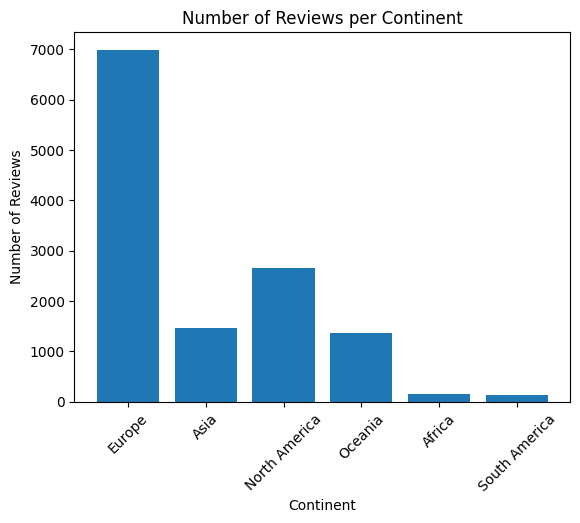

["Flew on SAA from Jo'burg to Abu Dhabi and we were over the airport when the captain announced we were 12th in the queue for landing with a resultant 40 minute circle before landing. Once in the immigration hall in terminal 1 another 70 minute queue. It is obvious the airport cannot cope with the increased traffic and the passenger experience becomes very poor. In the past my wife and I used Abu Dhabi rather than Dubai but I am having a serious rethink.", 'I was shocked to experience the enormous waiting time to clear immigration - it took me three hours of standing in a slow-moving line of exhausted people. That is not what I had expected of a place that wants to attract tourism. Of course I will continue using the airport because it is a hub for if one wants to travel from Southern Africa to Asia but in future I will try my utmost to avoid this. Beyond belief.', 'Clear signage - was transferring from T1 to T3. Long walk but easy to find way and not too crowded. Security lines short 

In [2]:
## make a bar plot of the number of reviews per continent
continents = list(continent_to_reviews.keys())
num_reviews = [len(continent_to_reviews[continent]) for continent in continents]
plt.bar(continents, num_reviews)
plt.ylabel('Number of Reviews')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.title('Number of Reviews per Continent')
plt.savefig('images/num_reviews_per_continent.png', dpi=300, bbox_inches='tight')
plt.show()

print(continent_to_reviews["Africa"])

In [3]:
from gcmap import GCMapper, Gradient
## make G undirected
G = G.to_undirected()
source_lon, source_lat, destination_lon, destination_lat, nb_flights = [], [], [], [], []
edges = G.edges(data=True)
for u, v, data in edges:
    if u != v:
        source_lon.append(IATA[u]['longitude'])
        source_lat.append(IATA[u]['latitude'])
        destination_lon.append(IATA[v]['longitude'])
        destination_lat.append(IATA[v]['latitude'])
        nb_flights.append(data['weight'])
        
grad = Gradient(((0, 0, 0, 0), (0.5, 204, 0, 153), (1, 255, 204, 230)))
gcm = GCMapper(cols=grad, height=2000, width=4000)
gcm.set_data(source_lon, source_lat, destination_lon, destination_lat, nb_flights)
img = gcm.draw()
img.save('images/flightmap.png')

100%|██████████| 18929/18929 [00:23<00:00, 809.12it/s] 


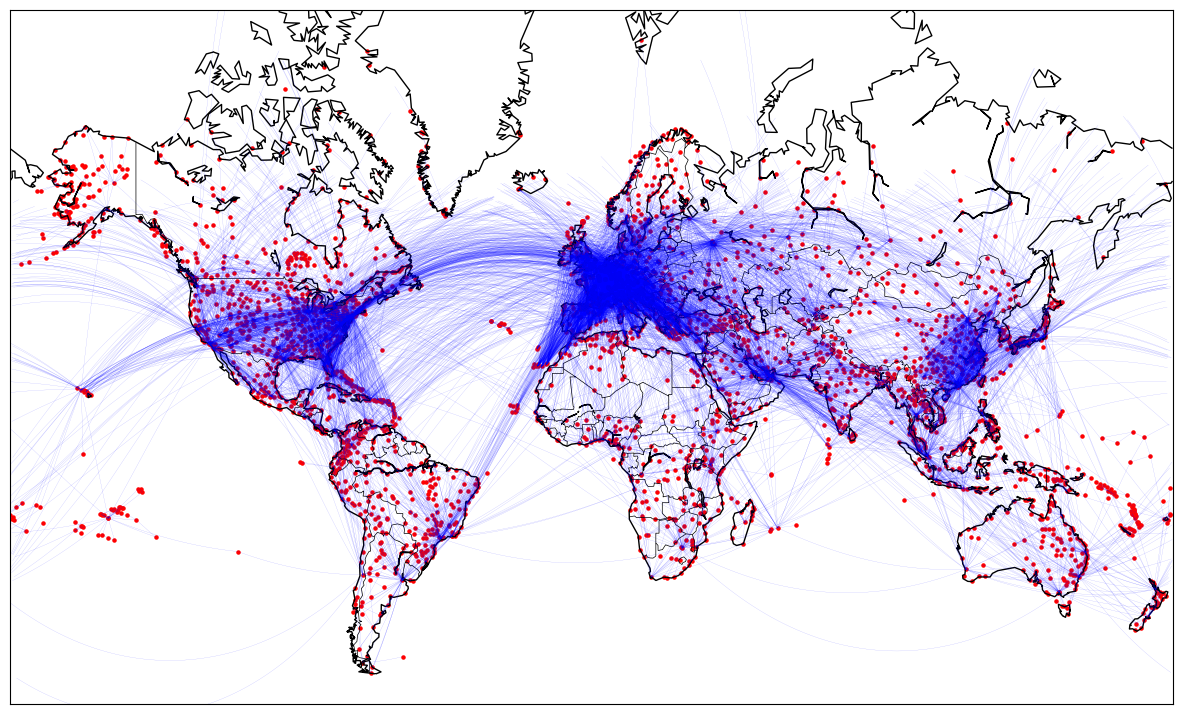

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase
from tqdm import tqdm

## create a basemap
fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()

## plot the nodes
lons = [IATA[node]['longitude'] for node in G.nodes()]
lats = [IATA[node]['latitude'] for node in G.nodes()]
x, y = m(lons, lats)
m.scatter(x, y, color='red', s=5)

## plot the edges
edges = G.edges(data=True)
for i, (u, v, data) in tqdm(enumerate(edges), total = len(edges)):
    lon1, lat1 = IATA[u]['longitude'], IATA[u]['latitude']
    lon2, lat2 = IATA[v]['longitude'], IATA[v]['latitude']
    if abs(lon1 - lon2) > 0.5 and abs(lat1 - lat2) > 0.5:
        m.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=0.1, color='blue', alpha=0.5)

In [3]:
import netwulf as nw
nw.visualize(G)

(None, None)

In [9]:
IATA["NDU"]

{'city': 'Rundu',
 'country': 'Namibia',
 'latitude': -17.956499099731,
 'longitude': 19.719400405884,
 'name': 'Rundu Airport',
 'continent': 'Africa'}

Nodes with the highest degree:  [('FRA', 477), ('CDG', 470), ('AMS', 463), ('IST', 455), ('ATL', 433), ('ORD', 409), ('PEK', 408), ('MUC', 380), ('DME', 376), ('DFW', 372)]


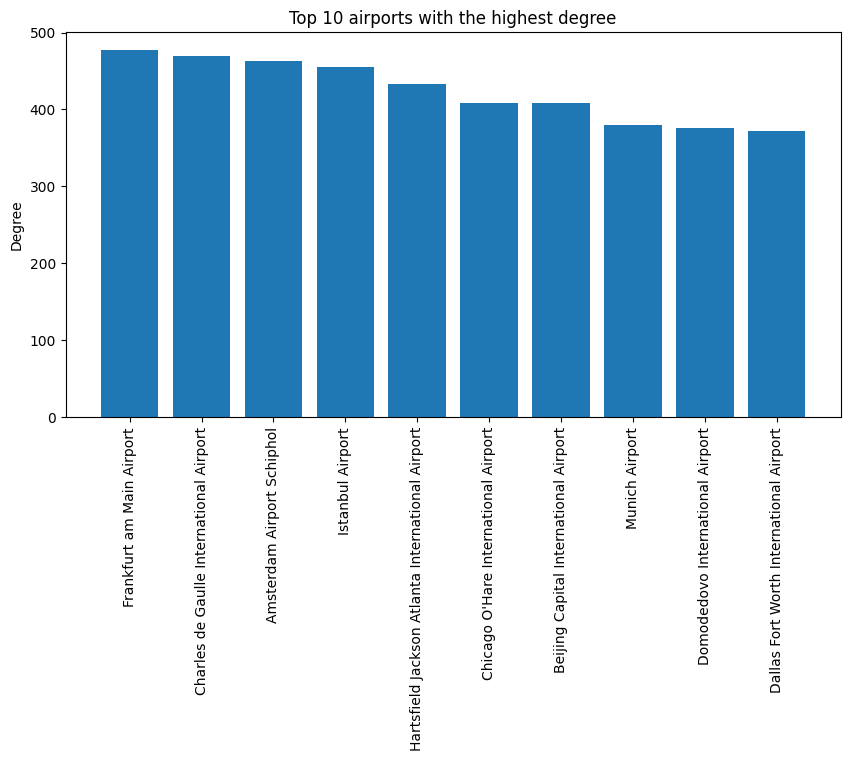

Edges with the highest weight:  [(('ORD', 'ATL'), 20), (('ATL', 'ORD'), 19), (('HKT', 'BKK'), 13), (('ORD', 'MSY'), 13), (('LHR', 'JFK'), 12), (('AUH', 'MCT'), 12), (('HKG', 'BKK'), 12), (('CAN', 'HGH'), 12), (('MIA', 'ATL'), 12), (('ATL', 'MIA'), 12)]


In [29]:
## find nodes with the highest degree
## make a bar plot of the top 10
## on the x-axis, put the airport city name
## on the y-axis, put the degree of the airport
degrees = dict(G.degree())
sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print("Nodes with the highest degree: ", sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10, 5))
plt.bar([G.nodes[k]["name"] for k, v in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]],
        [v for k, v in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]])
plt.xticks(rotation=90)
plt.ylabel('Degree')
plt.title('Top 10 airports with the highest degree')
plt.savefig('images/top10_airports_degree.png', dpi=300, bbox_inches='tight')
plt.show()



## find the edges with the highest weight
weights = nx.get_edge_attributes(G, 'weight')
sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10]
print("Edges with the highest weight: ", sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])